<a href="https://colab.research.google.com/github/htapiagroup/tensorflow-for-lania/blob/master/FishTrainModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TensoFlow 2
Duration: 0:30

Vamos a repetir los pasos del laboratorio anterior para re-entrenar el modelo para detectar frutas. Puesto que cada entorno de ejecucion es independiente, necesitamos volver a instalar la version de tensor flow y repetir el proceso de sincronizar el respositorio, etc.

## Configuracion
Duration: 0:30

### Instalar TensorFLow

Vamos a utilzar Colaboratory porque la configuracion del ecosistema de programacion, incluyendo la libreria `tensorflow` y el acceso a un procesador grafico GPU no requieren de ninguna configuracion avanzada. Primero instalamos la version adecuada de la libreria `tensorflow` ejecuantando los siguientes comandos:

In [0]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


## Clonar el repositorio
Duration: 1:00

El repositorio contiene los scripts que usaremos para  generar el modelo. 

In [0]:
ls

sample_data/


In [0]:
!git clone --branch wachuwa https://github.com/htapiagroup/tensorflow-for-lania

Cloning into 'tensorflow-for-lania'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 59.91 MiB | 31.72 MiB/s, done.
Resolving deltas: 100% (156/156), done.


In [0]:
cd tensorflow-for-lania/

/content/tensorflow-for-lania


## Descargar datos

Los datos estan alojados en una carpeta de GDrive. Para acceder a ellos hay tres opciones:
1. Usarndo la [REST API](https://developers.google.com/drive/v3/web/about-sdk);
1. Using una envoltura de la API como por ejemplo [PyDrive](https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html); o
1. Montando Google Drive en la maquina virtual donde estamos ejecutando.

Vamos a usar el tercer caso.

## Montando GDrive localmente
Duration: 5:00

El ejemplo siguiente muestra como montar Google Drive localmente usando un codigo de autorizacion. 

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
ls /content/gdrive/My\ Drive/Colab\ Notebooks/Datasets

eFIDS30.zip  tensor-flow-for-lania.zip


In [0]:
pwd

'/content/tensorflow-for-lania'

In [0]:
!unzip /content/gdrive/My\ Drive/Colab\ Notebooks/Datasets/eFIDS30.zip -d tf_files/

Archive:  /content/gdrive/My Drive/Colab Notebooks/Datasets/eFIDS30.zip
replace tf_files/FIDS30/avocados/9.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: tf_files/FIDS30/avocados/9.jpg  
  inflating: tf_files/FIDS30/avocados/lrot9.jpg  
  inflating: tf_files/FIDS30/avocados/lrot12.jpg  
  inflating: tf_files/FIDS30/avocados/16.jpg  
  inflating: tf_files/FIDS30/avocados/lrot47.jpg  
  inflating: tf_files/FIDS30/avocados/lrot17.jpg  
  inflating: tf_files/FIDS30/avocados/lrot32.jpg  
  inflating: tf_files/FIDS30/avocados/lrot51.jpg  
  inflating: tf_files/FIDS30/avocados/lrot3.jpg  
  inflating: tf_files/FIDS30/avocados/17.jpg  
  inflating: tf_files/FIDS30/avocados/lrot10.jpg  
  inflating: tf_files/FIDS30/avocados/lrot52.jpg  
  inflating: tf_files/FIDS30/avocados/2.jpg  
  inflating: tf_files/FIDS30/avocados/lrot22.jpg  
  inflating: tf_files/FIDS30/avocados/47.jpg  
  inflating: tf_files/FIDS30/avocados/43.jpg  
  inflating: tf_files/FIDS30/avocados/51.jpg  
  inflating: 

In [0]:
ls tf_files/FIDS30/

acerolas/  blackberries/  figs/         lemons/   passionfruit/  pomegranates/
apples/    blueberries/   grapefruits/  limes/    peaches/       raspberries/
apricots/  cantaloupes/   grapes/       mangos/   pears/         strawberries/
avocados/  cherries/      guava/        olives/   pineapples/    tomatoes/
bananas/   coconuts/      kiwifruit/    oranges/  plums/         watermelons/


In [0]:
#@markdown Vamos a usar el modelo con la siguiente imagen
from IPython.display import YouTubeVideo, display
from IPython.display import Image
import os, random
path="tf_files/FIDS30/"
fdir=random.choice(os.listdir(path))
fname=random.choice(os.listdir(path+fdir))                               
display(Image(filename="tf_files/FIDS30/pineapples/52.jpg"))
display(Image(filename=path+fdir+'/'+fname))

## Re-entrenado el modelo con las nuevas imagenes
Duration: 10:00

Primeros vamos a asegurarnos que estamos ejecutando sobre un dispositivo de aceleracion grafica.

In [0]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [0]:
print(tf.__version__)

1.13.1


Ahora vamos a reentrenar el modelo con los datos de frutas que descargamos 

In [0]:
%run scripts/retrain.py \
  --bottleneck_dir=tf_files/bottlenecks \
  --how_many_training_steps=500 \
  --model_dir=tf_files/models/ \
  --summaries_dir=tf_files/training_summaries/mobilenet_0.50_224 \
  --output_graph=tf_files/retrained_graph.pb \
  --output_labels=tf_files/retrained_labels.txt \
  --architecture=mobilenet_0.50_224 \
  --image_dir=tf_files/FIDS30

>> Downloading mobilenet_v1_0.50_224_frozen.tgz 100.1%


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python

Instructions for updating:
Use tf.gfile.GFile.
INFO:tensorflow:Looking for images in 'acerolas'
INFO:tensorflow:Looking for images in 'apples'
INFO:tensorflow:Looking for images in 'apricots'
INFO:tensorflow:Looking for images in 'avocados'
INFO:tensorflow:Looking for images in 'bananas'
INFO:tensorflow:Looking for images in 'blackberries'
INFO:tensorflow:Looking for images in 'blueberries'
INFO:tensorflow:Looking for images in 'cantaloupes'
INFO:tensorflow:Looking for images in 'cherries'
INFO:tensorflow:Looking for images in 'coconuts'
INFO:tensorflow:Looking for images in 'figs'
INFO:tensorflow:Looking for images in 'grapefruits'
INFO:tensorflow:Looking for images in 'grapes'
INFO:tensorflow:Looking for images in 'guava'
INFO:tensorflow:Looking for images in 'kiwifruit'
INFO:tensorflow:Looking for images in 'lemons'
INFO:tensorflow:Looking for images in 'limes'
INFO:tensorflow:Looking for images in 'mangos'
INFO:tensorflow:Looking for images in 'olives'
INFO:tensorflow:Looking for i

## Evaluate with images that may not be in the training data set

In [0]:
!wget http://elproductor.com/wp-content/uploads/2018/12/guayaba-.jpg

--2019-03-23 21:31:23--  http://elproductor.com/wp-content/uploads/2018/12/guayaba-.jpg
Resolving elproductor.com (elproductor.com)... 132.148.210.87
Connecting to elproductor.com (elproductor.com)|132.148.210.87|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 872797 (852K) [image/jpeg]
Saving to: ‘guayaba-.jpg’

guayaba-.jpg        100%[===================>] 852.34K  1.33MB/s    in 0.6s    

2019-03-23 21:31:24 (1.33 MB/s) - ‘guayaba-.jpg’ saved [872797/872797]



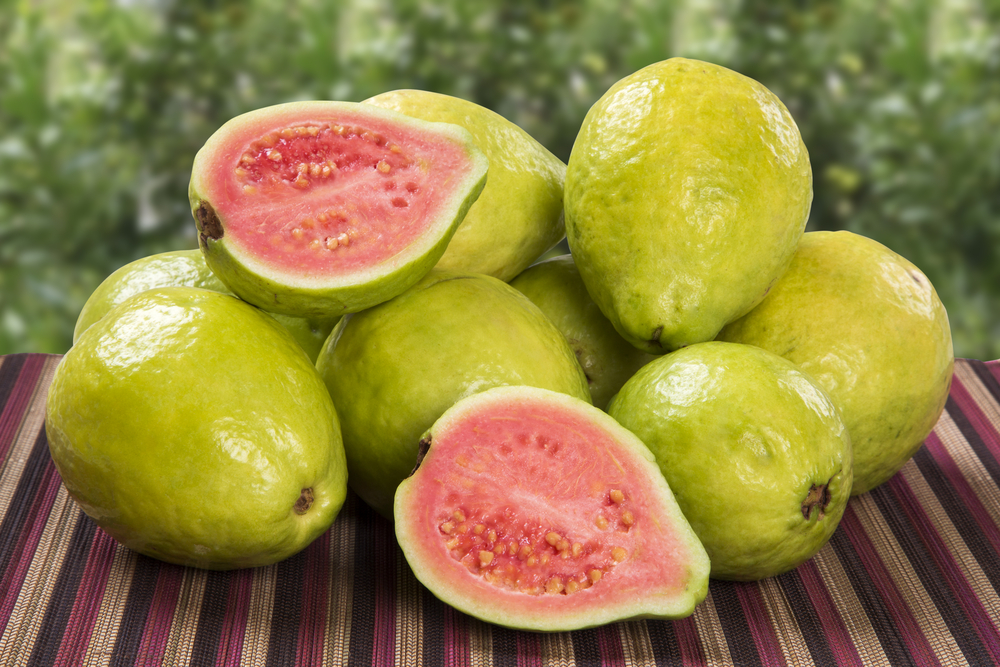

In [0]:
#@markdown Vamos a usar el modelo con la siguiente imagen
from IPython.display import YouTubeVideo, display
from IPython.display import Image
display(Image(filename="guayaba-.jpg", width=224))

In [0]:
%run scripts/label_image.py \
    --graph=tf_files/retrained_graph.pb  \
    --image=guayaba-.jpg


Evaluation time (1-image): 1.342s

guava (score=0.34411)
lemons (score=0.25237)
grapefruits (score=0.16640)
figs (score=0.10743)
acerolas (score=0.02316)


In [0]:
!wget https://www.my-vb.com/img/assets/product_flavors/goyave.jpg

--2019-03-23 21:32:32--  https://www.my-vb.com/img/assets/product_flavors/goyave.jpg
Resolving www.my-vb.com (www.my-vb.com)... 78.109.84.120
Connecting to www.my-vb.com (www.my-vb.com)|78.109.84.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53370 (52K) [image/jpeg]
Saving to: ‘goyave.jpg’

goyave.jpg          100%[===================>]  52.12K   255KB/s    in 0.2s    

2019-03-23 21:32:33 (255 KB/s) - ‘goyave.jpg’ saved [53370/53370]



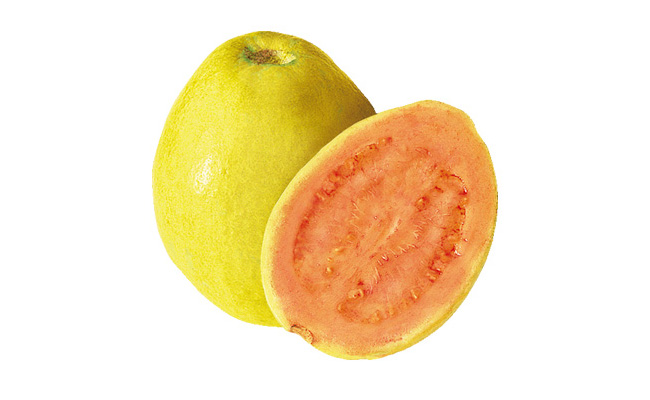


Evaluation time (1-image): 0.290s

guava (score=0.94043)
watermelons (score=0.02454)
mangos (score=0.01149)
grapefruits (score=0.00499)
lemons (score=0.00349)


In [0]:
display(Image(filename="goyave.jpg", width=224))
%run scripts/label_image.py \
    --graph=tf_files/retrained_graph.pb  \
    --image=goyave.jpg

--2019-03-23 21:33:09--  https://sportadictos.com/files/2016/01/Beneficios-guayaba.jpg
Resolving sportadictos.com (sportadictos.com)... 151.101.2.207, 151.101.66.207, 151.101.130.207, ...
Connecting to sportadictos.com (sportadictos.com)|151.101.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57901 (57K) [image/jpeg]
Saving to: ‘Beneficios-guayaba.jpg’

Beneficios-guayaba. 100%[===================>]  56.54K  --.-KB/s    in 0.02s   

2019-03-23 21:33:09 (2.76 MB/s) - ‘Beneficios-guayaba.jpg’ saved [57901/57901]



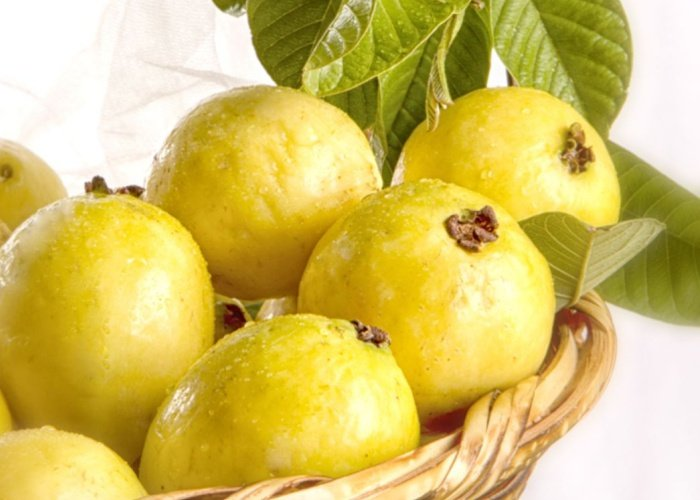


Evaluation time (1-image): 0.280s

figs (score=0.43470)
guava (score=0.16871)
pomegranates (score=0.14708)
peaches (score=0.07794)
pears (score=0.06295)


In [0]:
!wget https://sportadictos.com/files/2016/01/Beneficios-guayaba.jpg
display(Image(filename="Beneficios-guayaba.jpg", width=224))
%run scripts/label_image.py \
    --graph=tf_files/retrained_graph.pb  \
    --image=Beneficios-guayaba.jpg

## Retroalimentacion

## Entrega
Duration: 5:00

Positive
: Utilizando un motor de busqueda, encuentra al menos 10 imagenes de frutas de cualquiera de las 30 categoria que incluye nuestro catalogo de imagenes, descargalas, y ejecuta el script anterior para determinar que fruta es usando el modelo entrenado. Entrega una tabla similar a la siguiente para cada fruta, donde la primera linea sea la fuente de la imagen, despues la imagen y finalmente el resultado del script sobre la imagen.


>```
>!wget https://sportadictos.com/files/2016/01/Beneficios-guayaba.jpg
>display(Image(filename="Beneficios-guayaba.jpg", width=224))
>%run scripts/label_image.py \
>    --graph=tf_files/retrained_graph.pb  \
>    --image=Beneficios-guayaba.jpg
>```

## Preparando para desplegar en el movil

Para esto necesitamos clonar otro repositorio y reahcer todo el show

In [0]:
ls tf_files/

bottlenecks/  fruits_photos.zip  retrained_graph.pb    training_summaries/
FIDS30/       models/            retrained_labels.txt


In [0]:
!tflite_convert \
  --graph_def_file=tf_files/retrained_graph.pb \
  --output_file=tf_files/optimized_graph.lite \
  --input_format=TENSORFLOW_GRAPHDEF \
  --output_format=TFLITE \
  --input_shape=1,224,224,3 \
  --input_array=input \
  --output_array=final_result \
  --inference_type=FLOAT \
  --input_data_type=FLOAT

2019-03-23 21:45:03.651593: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-03-23 21:45:03.651913: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55f972a17760 executing computations on platform Host. Devices:
2019-03-23 21:45:03.651976: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-03-23 21:45:03.762430: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-03-23 21:45:03.762944: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55f972a18c00 executing computations on platform CUDA. Devices:
2019-03-23 21:45:03.763015: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla K80, Compute Capability 3.7
2019-03-23 21:45:03.763464: I tensorflow/core/common_runtime/gpu/gpu_device.cc:143

In [0]:
cp tf_files/optimized_graph.lite android/tflite/app/src/main/assets/graph.lite

In [0]:
cp tf_files/retrained_labels.txt android/tflite/app/src/main/assets/labels.txt

In [0]:
!cat android/tflite/app/src/main/assets/labels.txt

In [0]:
!cp -R android/ /content/gdrive/My\ Drive/Colab\ Notebooks/Datasets

## Salvando el archivo al sistema local
Duration: 5:00

Noten el nuevo archivo geneardo en el folder `tf_files/`. Vamos a copiar este folder en nuestro sistema local

In [0]:
pwd

'/content/tensorflow-for-lania'

In [0]:
!zip -r /content/tensor-flow-for-lania.zip /content/tensorflow-for-lania

In [0]:
!ls -alph /content

total 694M
drwxr-xr-x 1 root root 4.0K Mar 12 20:48 ./
drwxr-xr-x 1 root root 4.0K Mar 12 20:11 ../
drwxr-xr-x 4 root root 4.0K Mar  8 17:25 .config/
drwx------ 3 root root 4.0K Mar 12 20:43 gdrive/
drwxr-xr-x 1 root root 4.0K Mar  8 17:26 sample_data/
drwxr-xr-x 7 root root 4.0K Mar 12 20:43 tensorflow-for-lania/
-rw-r--r-- 1 root root 694M Mar 12 20:48 tensor-flow-for-lania.zip


In [0]:
!cp /content/tensor-flow-for-lania.zip /content/gdrive/My\ Drive/Colab\ Notebooks/Datasets

In [0]:
from google.colab import files

In [0]:
files.download("/content/tensor-flow-for-lania.zip")

In [0]:
ls

android/  CONTRIBUTING.md  ios/  LICENSE  README.md  scripts/  tf_files/
